In [9]:
import numpy as np # operations on numpy arrays
import pandas as pd # dataframe
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting


In [8]:
import os

features = np.empty([100,241])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Background_Skin'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
           
        features  = np.append(features,np.load(os.path.join(directory, filename), allow_pickle=True), axis=0) 
        print(os.path.join(directory, filename))
    else:
        continue

features = features[100:,:]
features.shape

C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC04_00C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC04_04C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC04_10C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC05_00C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC05_04C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC05_10C_3.np.npy
C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/C\GC06_00C_3.np.npy

(7230,)

In [98]:
features = np.genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/features.csv', delimiter=',')
labels = np.genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/Mean of 3 means/Labels.csv') # Control and infested were marked by 0, 1
features.shape
print(features)

[[-1.01534180e-01  1.79876629e-02  1.34065971e-01 ... -3.01634427e-02
  -2.60060821e-02 -2.13482417e-02]
 [-9.46868360e-02  2.62862500e-02  1.43283978e-01 ... -1.98629033e-02
  -1.64215881e-02 -1.25905471e-02]
 [-8.72552320e-02  4.76050675e-02  1.78303137e-01 ... -2.96013802e-03
   2.04346958e-03  7.67273735e-03]
 ...
 [-3.44753824e-02  3.71013999e-01  7.64493525e-01 ...  1.57760561e-01
   1.74763441e-01  1.93693936e-01]
 [-3.85807380e-02  3.42293441e-01  7.11161554e-01 ...  1.66984171e-01
   1.81515947e-01  1.97621569e-01]
 [-6.84975588e-04  3.87784570e-01  7.64737487e-01 ...  1.82174280e-01
   1.98550805e-01  2.16833591e-01]]


In [88]:
from numpy import genfromtxt
labels = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Pixel vectors/Background_Skin/Labels.csv', delimiter=',')
#labels = np.load('C:/Users/nekra/OneDrive/Desktop/PhD UKY/Data analysis/HSI/NIR/Labels.npy') # Control and infested were marked by 0, 1
labels.shape

(3200,)

In [99]:
# convert numpy array to pandas dataframe and normalize reflectance from 0-255 to 0-1
df = pd.DataFrame(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-0.101534,0.017988,0.134066,0.246701,0.355892,0.461640,0.563944,0.662804,0.758221,0.850195,...,-0.045252,-0.044598,-0.043443,-0.041788,-0.039633,-0.036977,-0.033820,-0.030163,-0.026006,-0.021348
1,-0.094687,0.026286,0.143284,0.256306,0.365353,0.470425,0.571521,0.668642,0.761788,0.850958,...,-0.033040,-0.032327,-0.031224,-0.029731,-0.027848,-0.025576,-0.022914,-0.019863,-0.016422,-0.012591
2,-0.087255,0.047605,0.178303,0.304839,0.427213,0.545424,0.659473,0.769360,0.875085,0.976647,...,-0.020467,-0.019843,-0.018593,-0.016718,-0.014217,-0.011090,-0.007338,-0.002960,0.002043,0.007673
3,-0.139990,-0.016905,0.102197,0.217318,0.328455,0.435611,0.538784,0.637974,0.733183,0.824408,...,-0.053421,-0.052614,-0.051370,-0.049691,-0.047576,-0.045025,-0.042037,-0.038614,-0.034754,-0.030459
4,-0.108867,0.048083,0.200467,0.348287,0.491543,0.630233,0.764360,0.893921,1.018918,1.139350,...,-0.029046,-0.028219,-0.026432,-0.023685,-0.019978,-0.015312,-0.009685,-0.003099,0.004447,0.012953


In [100]:
# load wavelength info. each wavelength respond to 1 band
df_wave = pd.read_csv('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/bands.csv')
df_wave

,Wavelength(nm),Band
0,900.1773,1
1,903.5323,2
2,906.8871,3
3,910.2417,4
4,913.5961,5
...,...,...
236,1686.8290,237
237,1690.1410,238
238,1693.4520,239
239,1696.7630,240


In [101]:
## add label data to the dataframe and rename each column using the corresponding wavelength
df.columns = df_wave['Wavelength(nm)']
df['Label'] = labels
df.head()

Wavelength(nm),900.1773,903.5323,906.8871,910.2417,913.5961,916.9503,920.3044,923.6582,927.0119,930.3654,...,1673.582,1676.894,1680.2060000000001,1683.5179999999998,1686.829,1690.141,1693.4520000000002,1696.763,1700.0739999999998,Label
0,-0.101534,0.017988,0.134066,0.246701,0.355892,0.461640,0.563944,0.662804,0.758221,0.850195,...,-0.044598,-0.043443,-0.041788,-0.039633,-0.036977,-0.033820,-0.030163,-0.026006,-0.021348,0.0
1,-0.094687,0.026286,0.143284,0.256306,0.365353,0.470425,0.571521,0.668642,0.761788,0.850958,...,-0.032327,-0.031224,-0.029731,-0.027848,-0.025576,-0.022914,-0.019863,-0.016422,-0.012591,0.0
2,-0.087255,0.047605,0.178303,0.304839,0.427213,0.545424,0.659473,0.769360,0.875085,0.976647,...,-0.019843,-0.018593,-0.016718,-0.014217,-0.011090,-0.007338,-0.002960,0.002043,0.007673,0.0
3,-0.139990,-0.016905,0.102197,0.217318,0.328455,0.435611,0.538784,0.637974,0.733183,0.824408,...,-0.052614,-0.051370,-0.049691,-0.047576,-0.045025,-0.042037,-0.038614,-0.034754,-0.030459,0.0
4,-0.108867,0.048083,0.200467,0.348287,0.491543,0.630233,0.764360,0.893921,1.018918,1.139350,...,-0.028219,-0.026432,-0.023685,-0.019978,-0.015312,-0.009685,-0.003099,0.004447,0.012953,0.0


In [102]:
# dataframe transformation to match the input data format of lineplot function in seaborn 
# details about lineplot https://seaborn.pydata.org/generated/seaborn.lineplot.html
df_melt = df.melt(id_vars='Label', value_name='Reflectance')
df_melt.head()

,Label,Wavelength(nm),Reflectance
0,0.0,900.177,-0.101534
1,0.0,900.177,-0.094687
2,0.0,900.177,-0.087255
3,0.0,900.177,-0.139990
4,0.0,900.177,-0.108867


In [103]:
# define the colormap mapping 0,1,2,3 to different colors
from matplotlib.colors import ListedColormap
sorghum_cmap = ListedColormap([ '#32CD32', '#FF8C00'], name='organs') # hex code  #, , 

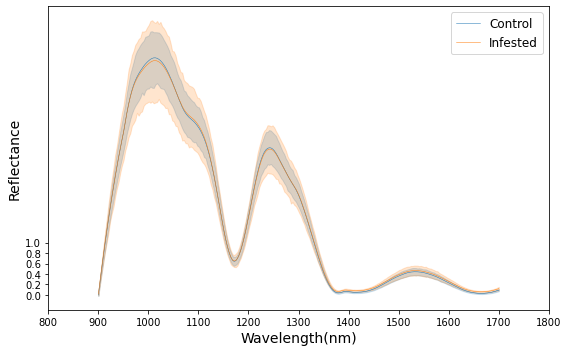

In [104]:
fig, ax = plt.subplots(figsize=(8, 5)) # define a figure and a single axes object
ax = sns.lineplot(ax=ax, data=df_melt, x='Wavelength(nm)', y='Reflectance',  
                  hue='Label', linewidth=.5)
ax.set_xticks([800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800])
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_ylabel('Reflectance', fontsize=14)
ax.set_xlabel('Wavelength(nm)', fontsize=14)
ax.legend(frameon=True, fontsize=12, labels=['Control','Infested'])

ax.spines['right'].set_visible(True) # remove right axis
ax.spines['top'].set_visible(True) # remove top axis
plt.tight_layout()
#plt.savefig('hyp_signature.png', dpi=300) # save figuer with resolution of 300 dpi
plt.show()

In [63]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn

In [278]:
pca = PCA(n_components=10) # let's only consider the first two PCs
pca_results = pca.fit_transform(features) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(5100, 10)
variance explained by the first two PCs: 95.58%, 3.05%


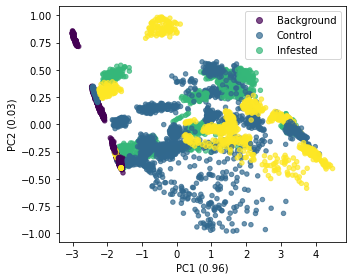

In [280]:
# visualize first two components
fig, ax = plt.subplots(figsize=(5,4))
s1, s2 = pca_results[:, 0], pca_results[:, 1]
scatter = ax.scatter(s1, s2, c=labels, s=20, alpha=0.7)

# create the legend
hs, _ = scatter.legend_elements() # handlers of the legend
ls = ['Background','Control','Infested'] # labels of the legend
ax.legend(hs, ls)

# add labels
ax.set_xlabel('PC1 (%.2f)'%pca_scores[0])
ax.set_ylabel('PC2 (%.2f)'%pca_scores[1])

plt.tight_layout()
plt.savefig('pca.png', dpi=150)
plt.show()

In [281]:
from sklearn.model_selection import KFold # for five fold cross validation
from sklearn.metrics import confusion_matrix # calcuate confusion matrix
from sklearn.metrics import classification_report

In [282]:
from sklearn import svm

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = svm.SVC(kernel='rbf') # try linear kernel also
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2])
    print(classification_report(y_test, y_predict, labels=[0,1,2]))

overal accuracy: 0.914
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       204
           1       0.94      0.92      0.93       228
           2       0.95      0.82      0.88       208

    accuracy                           0.91       640
   macro avg       0.92      0.91      0.91       640
weighted avg       0.92      0.91      0.91       640

overal accuracy: 0.883
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       196
           1       0.90      0.92      0.91       200
           2       0.95      0.76      0.85       244

    accuracy                           0.88       640
   macro avg       0.89      0.89      0.88       640
weighted avg       0.89      0.88      0.88       640

overal accuracy: 0.895
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       206
           1       0.93      0.89      0.91       232
      

In [69]:

from sklearn.neighbors import KNeighborsClassifier as KNN

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = KNN(n_neighbors=5) # default is 5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2])
    print(classification_report(y_test, y_predict, labels=[0,1,2]))
    
## plot confusion matrix

overal accuracy: 0.967
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       204
           1       0.99      0.98      0.99       228
           2       0.94      0.96      0.95       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

overal accuracy: 0.941
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       196
           1       0.97      0.98      0.98       200
           2       0.91      0.94      0.93       244

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640

overal accuracy: 0.958
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       206
           1       1.00      0.97      0.98       232
      

In [71]:
from sklearn.ensemble import RandomForestClassifier as RF

In [72]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = RF() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2])
    print(classification_report(y_test, y_predict, labels=[0,1,2]))

overal accuracy: 0.969
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       204
           1       0.98      1.00      0.99       228
           2       0.98      0.93      0.96       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

overal accuracy: 0.953
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       196
           1       0.99      0.99      0.99       200
           2       0.98      0.90      0.94       244

    accuracy                           0.95       640
   macro avg       0.95      0.96      0.95       640
weighted avg       0.96      0.95      0.95       640

overal accuracy: 0.959
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       206
           1       1.00      0.99      0.99       232
      

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = LDA() # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2])
    print(classification_report(y_test, y_predict, labels=[0, 1,2]))

overal accuracy: 0.806
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       204
           1       0.84      0.73      0.78       228
           2       0.87      0.70      0.78       208

    accuracy                           0.81       640
   macro avg       0.82      0.81      0.80       640
weighted avg       0.82      0.81      0.80       640

overal accuracy: 0.750
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       196
           1       0.74      0.70      0.72       200
           2       0.87      0.59      0.70       244

    accuracy                           0.75       640
   macro avg       0.77      0.76      0.75       640
weighted avg       0.77      0.75      0.74       640

overal accuracy: 0.747
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       206
           1       0.80      0.62      0.70       232
      

In [75]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(pca_results):
    X_train, X_test = pca_results[train_index], pca_results[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    clf = AdaBoostClassifier(n_estimators=1000, learning_rate=.9) # try parameters: n_estimators=200, max_depth=5
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    acc = (y_predict==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, y_predict, labels=[0,1,2])
    print(classification_report(y_test, y_predict, labels=[0,1,2]))
# show the confusion matrix

overal accuracy: 0.622
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       204
           1       0.56      0.81      0.66       228
           2       0.38      0.25      0.30       208

    accuracy                           0.62       640
   macro avg       0.62      0.62      0.61       640
weighted avg       0.62      0.62      0.61       640

overal accuracy: 0.547
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       196
           1       0.52      0.88      0.66       200
           2       0.38      0.29      0.33       244

    accuracy                           0.55       640
   macro avg       0.59      0.57      0.55       640
weighted avg       0.58      0.55      0.53       640

overal accuracy: 0.580
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       206
           1       0.59      0.89      0.71       232
      

In [24]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score 

In [81]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=123)
# Define the PLS object
pls_binary = PLSRegression(n_components=10)
# Fit the training set
pls_binary.fit(X_train, y_train)
# Predictions: these won't generally be integer numbers
y_pred = pls_binary.predict(X_test)[:,0]
# "Force" binary prediction by thresholding
binary_prediction = (pls_binary.predict(X_test)[:,0] > 0.5).astype('uint8')
print(binary_prediction, y_test)  

[1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 

In [90]:
def pls_da(X_train,y_train, X_test):            # Define the PLS object for binary classification 
    plsda = PLSRegression(n_components=10)            # Fit the training set
    plsda.fit(X_train, y_train)            # Binary prediction on the test set, done with thresholding
    binary_prediction = (pls_binary.predict(X_test)[:,0] > 0.5).astype('uint8')
    return binary_prediction  

In [91]:
accuracy = []
cval = KFold(n_splits=5, shuffle=True, random_state=123)
for train, test in cval.split(features):
    y_pred = pls_da(features[train,:], labels[train], features[test,:])
    accuracy.append(accuracy_score(labels[test], y_pred))
    print("Average accuracy on 5 splits: ", np.array(accuracy).mean())  

Average accuracy on 5 splits:  0.8181818181818182
Average accuracy on 5 splits:  0.8238636363636365
Average accuracy on 5 splits:  0.8401515151515152
Average accuracy on 5 splits:  0.8431818181818183
Average accuracy on 5 splits:  0.8450000000000001


In [76]:
# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    plsda = PLSRegression(n_components=10) 
    plsda.fit(X_train, y_train)
    y_predict = plsda.predict(X_train)
    binary_prediction = (plsda.predict(X_test)[:,0] > 0.5).astype('uint8')
    acc = (binary_prediction==y_test).sum()/len(y_test)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_test, binary_prediction, labels=[0,1,2])
    print(classification_report(y_test, binary_prediction, labels=[0, 1,2]))
# show the confusion matrix

overal accuracy: 0.600
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       204
           1       0.48      0.97      0.64       228
           2       0.00      0.00      0.00       208

    accuracy                           0.60       640
   macro avg       0.46      0.59      0.50       640
weighted avg       0.46      0.60      0.50       640

overal accuracy: 0.525
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       196
           1       0.41      0.99      0.58       200
           2       0.00      0.00      0.00       244

    accuracy                           0.53       640
   macro avg       0.44      0.56      0.46       640
weighted avg       0.40      0.53      0.42       640

overal accuracy: 0.580
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       206
           1       0.47      0.95      0.63       232
      

C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\

overal accuracy: 0.552
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       207
           1       0.45      0.98      0.61       225
           2       0.00      0.00      0.00       208

    accuracy                           0.55       640
   macro avg       0.45      0.54      0.45       640
weighted avg       0.45      0.55      0.46       640



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
# train and evaluate your model
kf = KFold(n_splits=5, shuffle=True, random_state=123)
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    plsda = PLSRegression(n_components=10) 
    plsda.fit(X_train, y_train)
    y_predict = plsda.predict(X_train)
    binary_prediction = (plsda.predict(X_train)[:,0] > 0.5).astype('uint8')
    acc = (binary_prediction==y_train).sum()/len(y_train)
    print('overal accuracy: %.3f'%acc)
    cfx = confusion_matrix(y_train, binary_prediction, labels=[0,1,2])
    print(classification_report(y_train, binary_prediction, labels=[0, 1,2]))
# show the confusion matrix

overal accuracy: 0.570
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       796
           1       0.45      0.98      0.61       872
           2       0.00      0.00      0.00       892

    accuracy                           0.57      2560
   macro avg       0.46      0.58      0.48      2560
weighted avg       0.44      0.57      0.47      2560

overal accuracy: 0.589
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       804
           1       0.47      0.97      0.63       900
           2       0.00      0.00      0.00       856

    accuracy                           0.59      2560
   macro avg       0.46      0.59      0.49      2560
weighted avg       0.45      0.59      0.49      2560

overal accuracy: 0.575
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       794
           1       0.45      0.98      0.62       868
      

C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



              precision    recall  f1-score   support

           0       0.93      0.79      0.85       813
           1       0.46      0.98      0.63       885
           2       0.00      0.00      0.00       862

    accuracy                           0.59      2560
   macro avg       0.46      0.59      0.49      2560
weighted avg       0.46      0.59      0.49      2560

overal accuracy: 0.570
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       793
           1       0.45      0.98      0.61       875
           2       0.00      0.00      0.00       892

    accuracy                           0.57      2560
   macro avg       0.46      0.58      0.48      2560
weighted avg       0.44      0.57      0.47      2560



C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [258]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
dark_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_03_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_REF_DARK_02_03_2021.raw')
data_ref = envi.open('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC4_CALYX_02_03_2021.hdr',
                     'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/NIR/NIR_FC4_CALYX_02_03_2021.raw')

dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

data_nparr.shape

# load the hyperspectral image cube in numpy array
#img_npy = np.load('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Semantic segmentation example/NPYs/CM024_2017-08-30.npy')[35:478, :, :]/255 # remove the pot and top frame parts
#img_npy.shape



C:\Users\nek222\Anaconda3\lib\site-packages\spectral\io\envi.py:195: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.setttings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
<ipython-input-258-88cb1bd1cf2b>:8: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  dark_nparr = np.array(dark_ref.load())


Header parameter names converted to lower case.
Header parameter names converted to lower case.


<ipython-input-258-88cb1bd1cf2b>:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_nparr = np.array(data_ref.load())


(377, 320, 256)

In [259]:
dark_nparr = dark_nparr[0:320,:,:]
data_nparr = data_nparr[0:320,:,:] 
corrected_nparr = np.subtract(data_nparr, dark_nparr)/255
corrected_nparr.shape

(320, 320, 256)

In [260]:
clf = RF()
clf.fit(features, labels)

   
# make predictions
x, y, z = corrected_nparr.shape
x_test = corrected_nparr.reshape(x*y, z) # reshape 3d (443, 320, 243) to 2d (141760, 243) 
x_test = x_test[:,6:247]

pca = PCA(n_components=10) # let's only consider the first two PCs
pca_results_x_test = pca.fit_transform(x_test) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results_x_test.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

   
y_test = clf.predict(x_test).reshape(x, y) # reshape (141760, ) back to (443, 320) to make picture
y_test = y_test[:,6:247]
print(y_test.shape)

(102400, 10)
variance explained by the first two PCs: 98.99%, 0.29%
(320, 241)


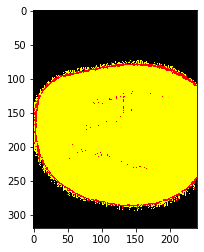

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
# define the colormap mapping 0,1,2 to different colors
from matplotlib.colors import ListedColormap
# show our prediction results
colors=["black", "yellow", "red"]
cmap = matplotlib.colors.ListedColormap(colors) 
plt.imshow(y_test, cmap=cmap)
plt.imsave('FC4_CALYX.png', y_test, cmap=cmap) # run if you want to save the prediction as a png file